In [8]:
import numpy as np
from scipy.stats import ks_2samp
np.random.seed(42)
sample1 = np.random.normal(-2, 1.5, 100)
sample2 = np.random.normal(0.6, 1.5, 100)

ks_statistic, p_value = ks_2samp(sample1, sample2, alternative="less")

print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
	print("Reject the null hypothesis. The two samples come from different distributions.")
else:
	print("Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")


Kolmogorov–Smirnov Statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.


In [9]:
sample1.max()

0.7784172767634066

In [10]:
sample2.min()

-2.2781568229485623

In [2]:
all_rec_dict = np.load("new_data.npy", allow_pickle=True).tolist()

In [14]:
ca1 = []
ca3 = []
for key in all_rec_dict.keys():
    n = 0
    for rec in all_rec_dict[key]:
        if np.max(rec[0][5000:15000, 0]) < 100 and np.max(rec[1][5000:15000, 0]) < 100 and np.min(rec[1][5000:15000, 0]) > -50:
            n += 1
            ca1.append(rec[0][5000:15000, 0])
            ca3.append(rec[1][5000:15000, 0])     
ca1 = np.array(ca1)
ca3 = np.array(ca3)

In [15]:
ca1[0]

array([-4.85229492, -5.40161133, -4.8828125 , ..., -5.03540039,
       -5.12695312, -5.09643555])

In [16]:
from scipy.ndimage import gaussian_filter

In [17]:
def removeArts(signal):
    s = signal.copy()
    mean = np.mean(s)
    normS = normalization(s)
    for i in range(5200, 5300):
        if abs(normS[i])>0.7:
            s[i] = s[i-100]
    normS = normalization(s)
    for i in range(0, 5200):
        if abs(normS[i])>5:
            s[i] = mean
    for i in range(6000, len(s)):
        if abs(normS[i])>5:
            s[i] = mean
    normS = normalization(s)
    for i in range(0, 5200):
        if abs(normS[i])>5:
            s[i] = mean
    for i in range(6000, len(s)):
        if abs(normS[i])>5:
            s[i] = mean
    normS = normalization(s)
    for i in range(5200, 5240):
        if abs(normS[i])>0.5:
            s[i] = s[i-40]
    return s

def normalization(s):
    return np.array((s-s.mean())/s.std())

In [18]:
ca1_preproc = np.array([removeArts(rec) for rec in ca1])
ca3_preproc = np.array([removeArts(rec) for rec in ca3])

ca1_preproc -= ca1_preproc.mean(axis=1)[..., None]
ca3_preproc -= ca3_preproc.mean(axis=1)[..., None]

def gausFilter(signal, sigma = 35):
    min1 = np.min(signal)
    gf = gaussian_filter(signal, sigma)
    min2 = np.min(gf)
    return gf*min1/min2

ca1_filt = np.array([gausFilter(rec) for rec in ca1_preproc])
ca3_filt = np.array([gausFilter(rec) for rec in ca3_preproc])

In [19]:
ks_statistic, p_value = ks_2samp(ca1_filt[0], ca3_filt[0])

print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
	print("Reject the null hypothesis. The two samples come from different distributions.")
else:
	print("Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")

Kolmogorov–Smirnov Statistic: 0.1535
P-value: 3.7236394863916366e-103
Reject the null hypothesis. The two samples come from different distributions.


In [21]:
import matplotlib.pyplot as plt

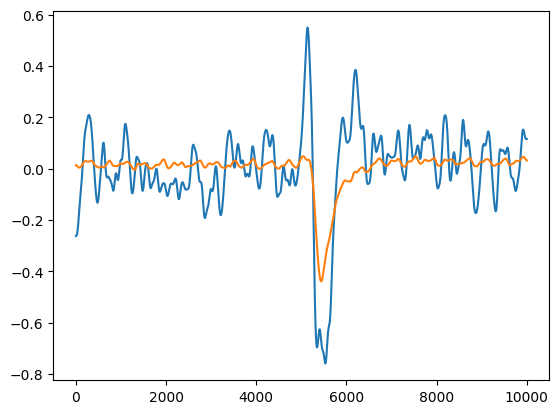

In [24]:
plt.plot(ca1_filt[0])
plt.plot(ca1_filt[1])

### Сравнение предсказаний

In [5]:
ca1 = np.load("ca1.npy", allow_pickle=True)
ca1_preds = np.load("ca1_preds.npy", allow_pickle=True)[:, :, 0]


In [6]:
ca1_ans = ca1[:, 4500:5500]
ca1_preds_ans = ca1_preds[:, 4500:5500]


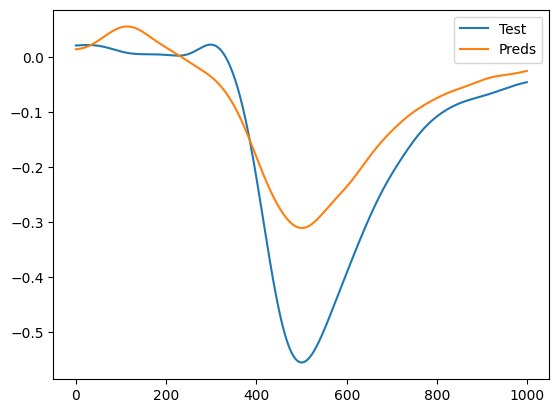

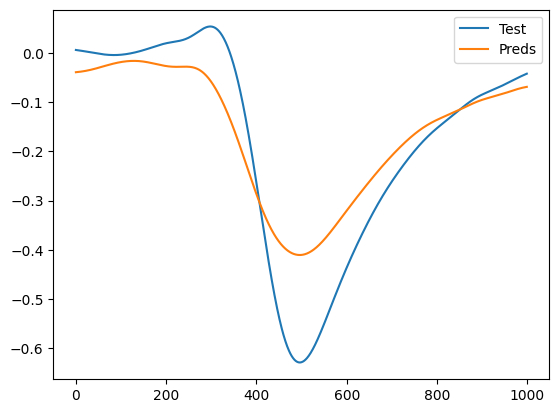

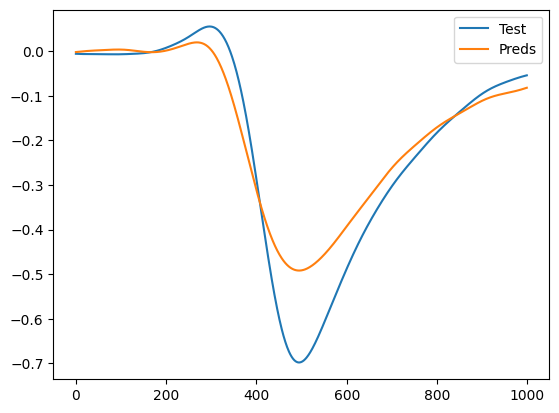

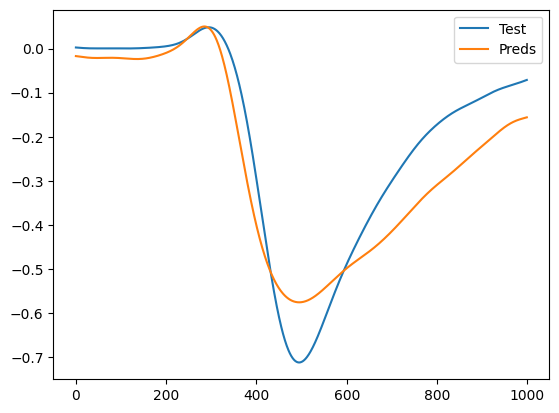

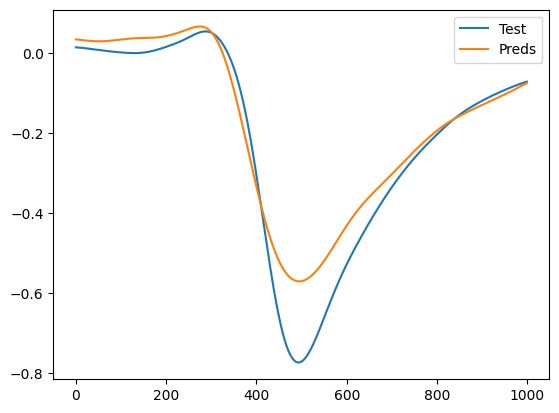

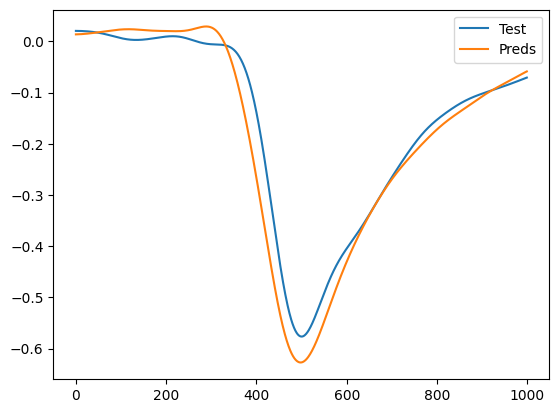

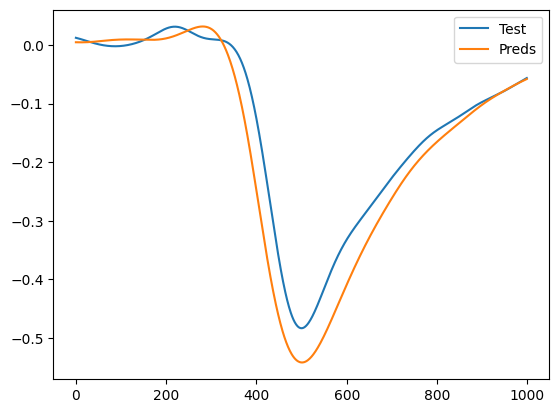

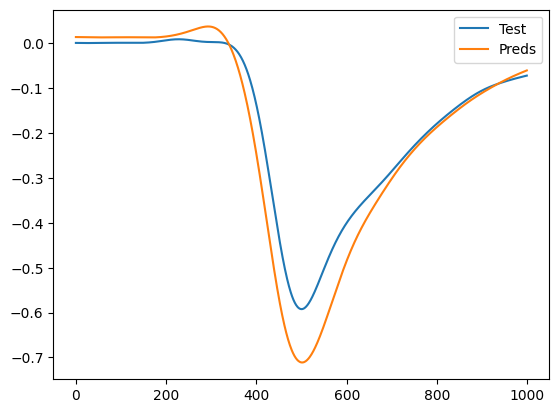

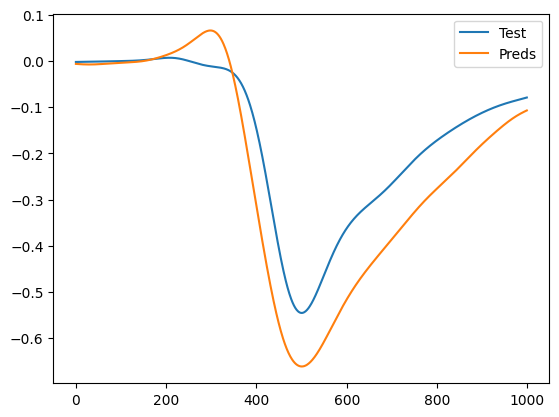

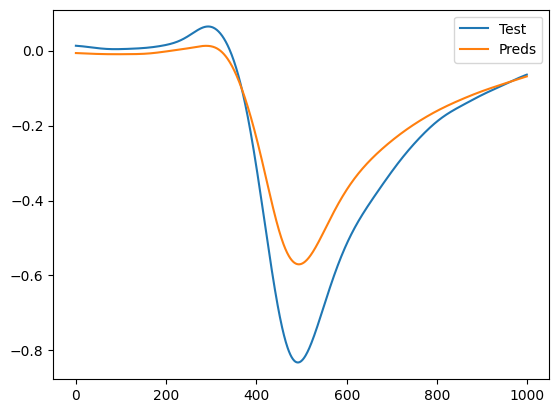

In [28]:
for i in range(10):

    plt.plot(ca1_ans[i], label="Test")
    plt.plot(ca1_preds_ans[i], label="Preds")
    plt.legend()
    plt.show()


In [9]:
import seaborn as sns
import pandas as pd

In [33]:
np.array([[(i + 1) * 100] * 1000 for i in range(10)])[..., None].shape

(10, 1000, 1)

In [40]:
df = pd.DataFrame(np.hstack((np.array([[(i + 1) * 100] * 1000 for i in range(10)]).flatten()[..., None], ca1_ans.flatten()[..., None])))
df = df.rename(columns={0: "Amplitude", 1:"Values"}) 
df.insert(1, "True", ["True"] * 10000)
df2 = pd.DataFrame(np.hstack((np.array([[(i + 1) * 100] * 1000 for i in range(10)]).flatten()[..., None], ca1_preds_ans.flatten()[..., None])))
df2 = df2.rename(columns={0: "Amplitude", 1:"Values"}) 
df2.insert(1, "True", ["Predicted"] * 10000)
df_conc = pd.concat([df, df2])

<Axes: xlabel='Amplitude', ylabel='Values'>

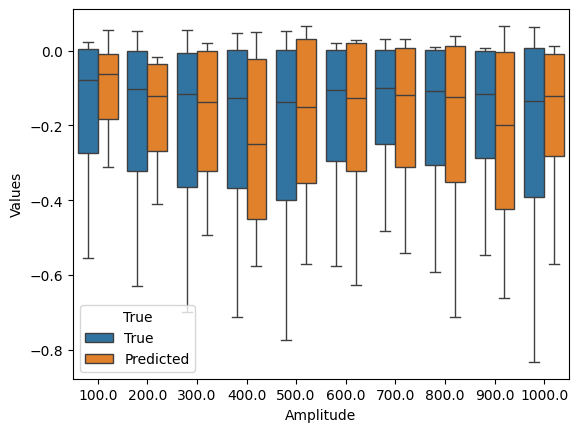

In [41]:
sns.boxplot(data=df_conc, x="Amplitude", y="Values", hue="True")

#### Функции распределения

In [34]:
def EDF(x, data):
    return np.sum(data <= x) / len(data)

edf_values_ca1 = []
edf_values_ca1_preds = []

for i in range(10):
    edf_values_ca1.append([EDF(x, ca1_ans[i]) for x in np.sort(ca1_ans[i])])
    edf_values_ca1_preds.append([EDF(x, ca1_preds_ans[i]) for x in np.sort(ca1_preds_ans[i])])


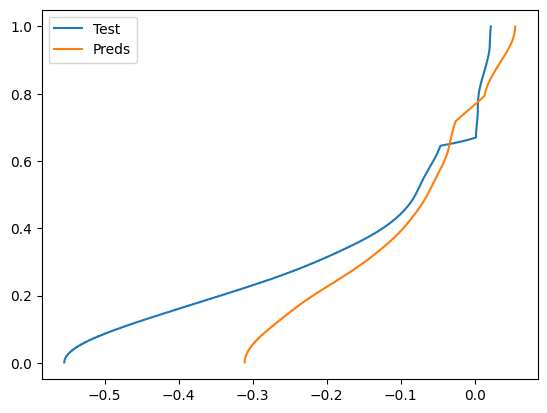

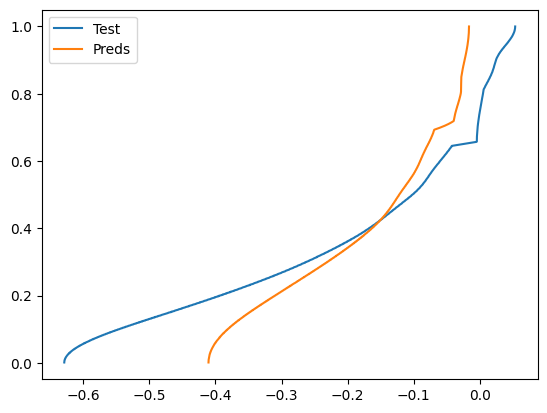

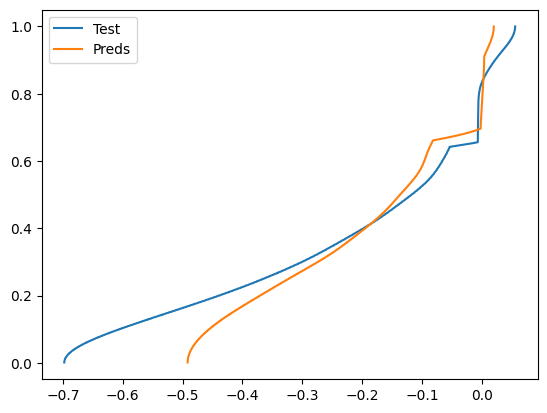

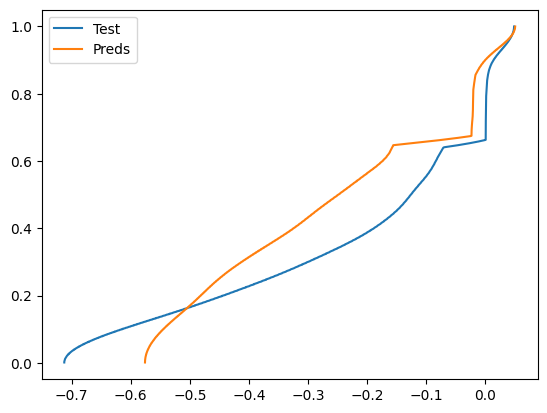

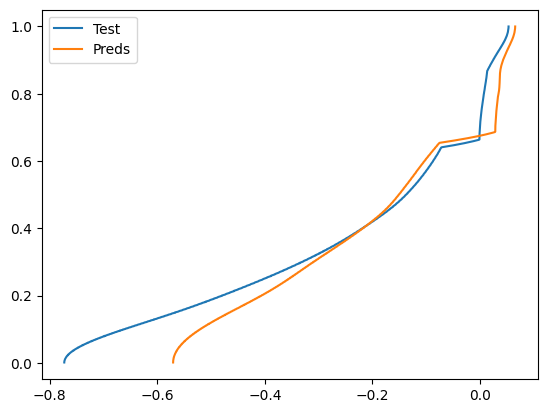

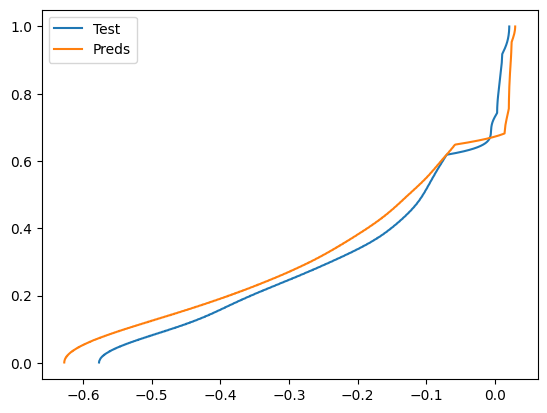

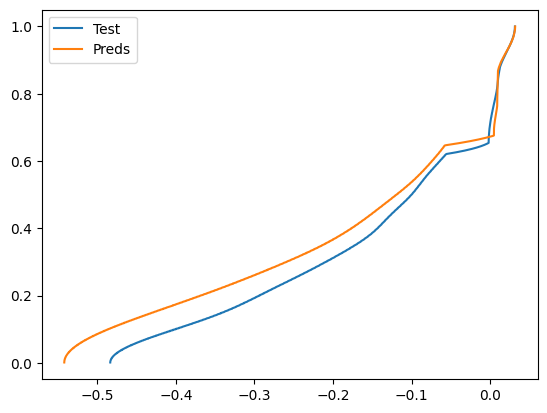

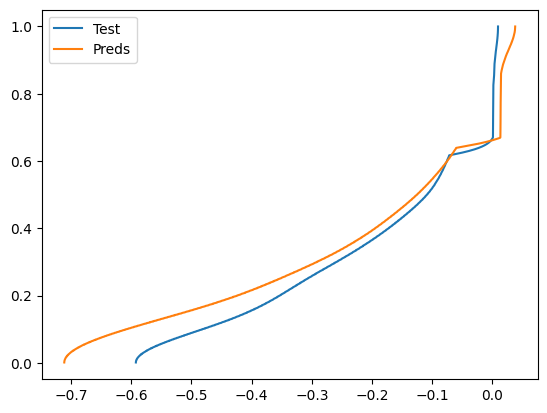

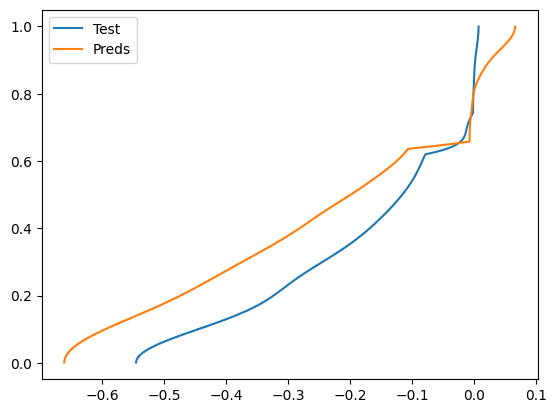

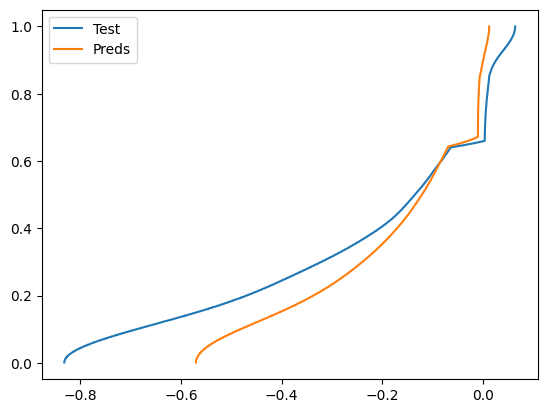

In [36]:
for i in range(10):

    plt.plot(np.sort(ca1_ans[i]), edf_values_ca1[i], label="Test")
    plt.plot(np.sort(ca1_preds_ans[i]), edf_values_ca1_preds[i], label="Preds")
    plt.legend()
    plt.show()


In [43]:
ca1_perc = []
ca1_preds_perc = []
for i in range(10):
    ca1_perc.append(np.percentile(ca1_ans, range(100)))
    ca1_preds_perc.append(np.percentile(ca1_preds_ans, range(100)))
                         

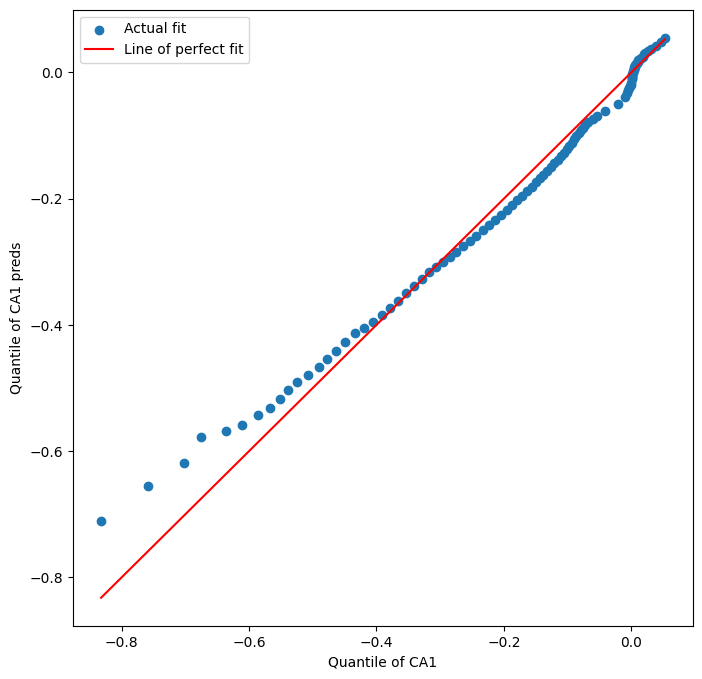

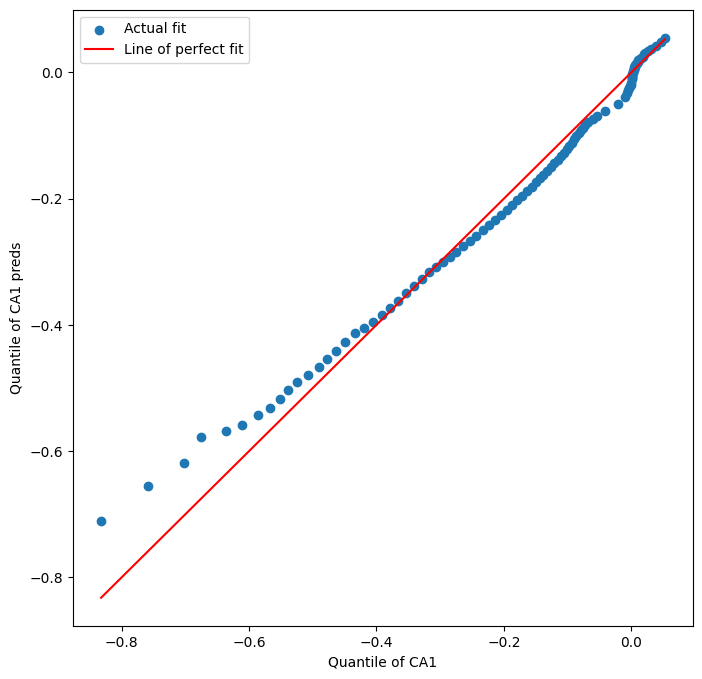

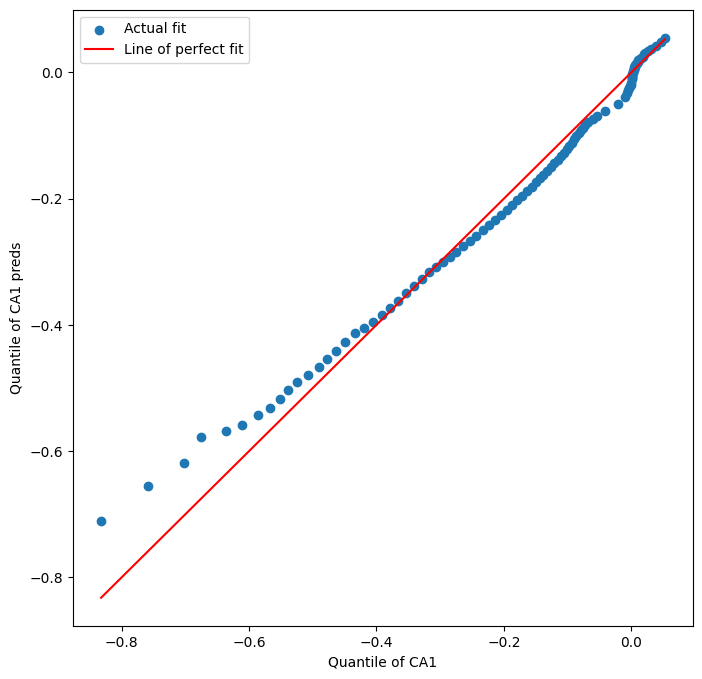

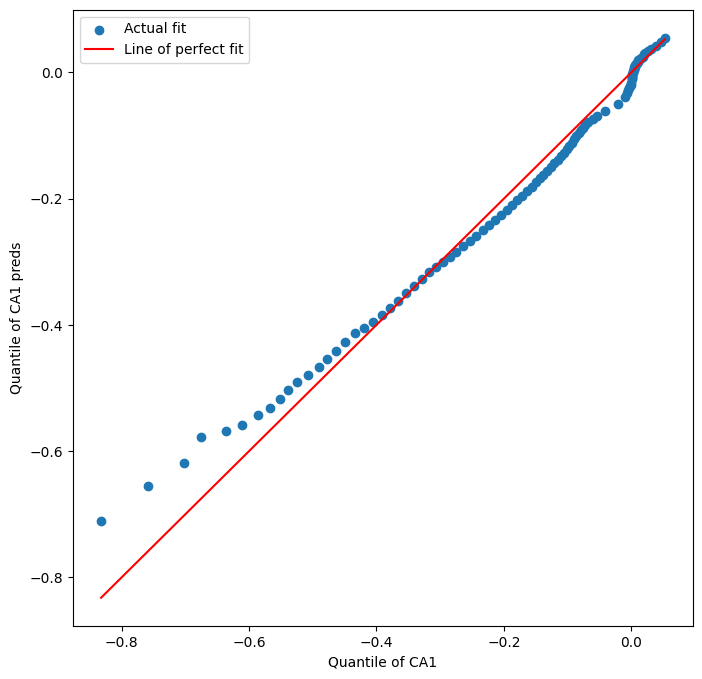

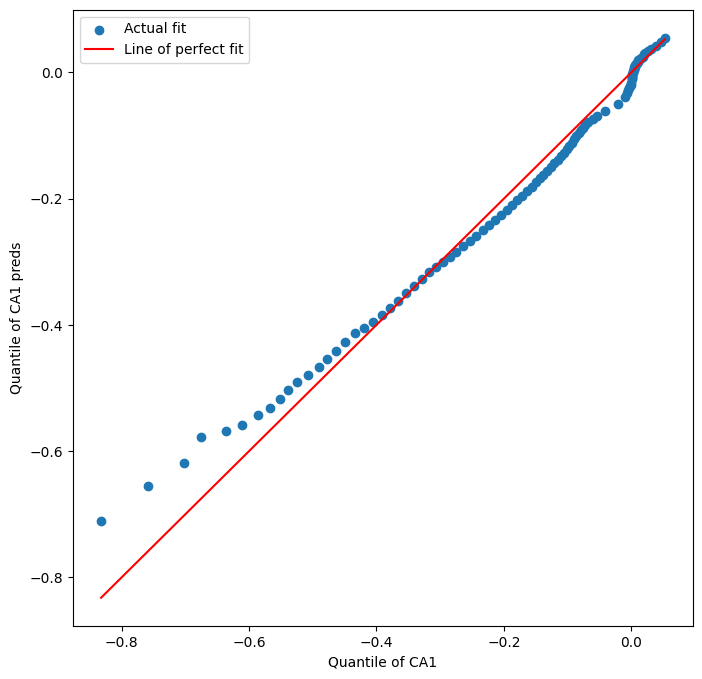

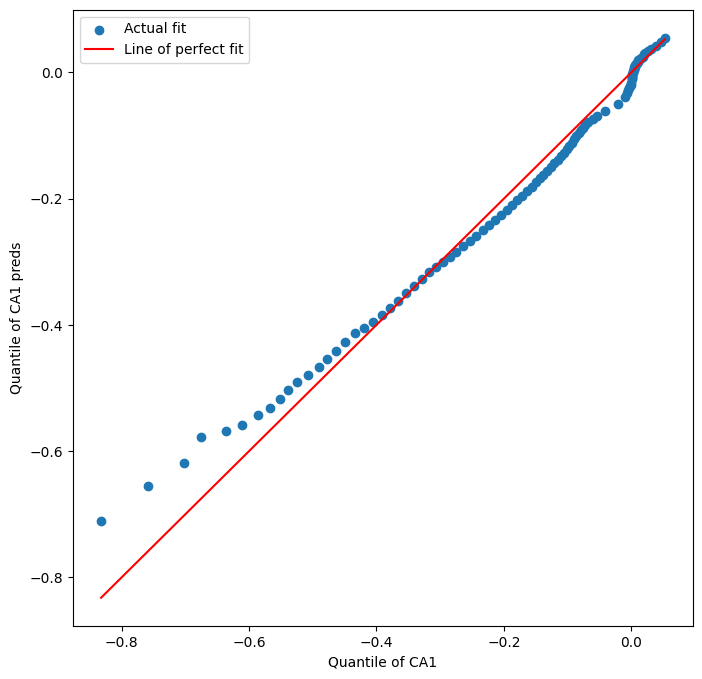

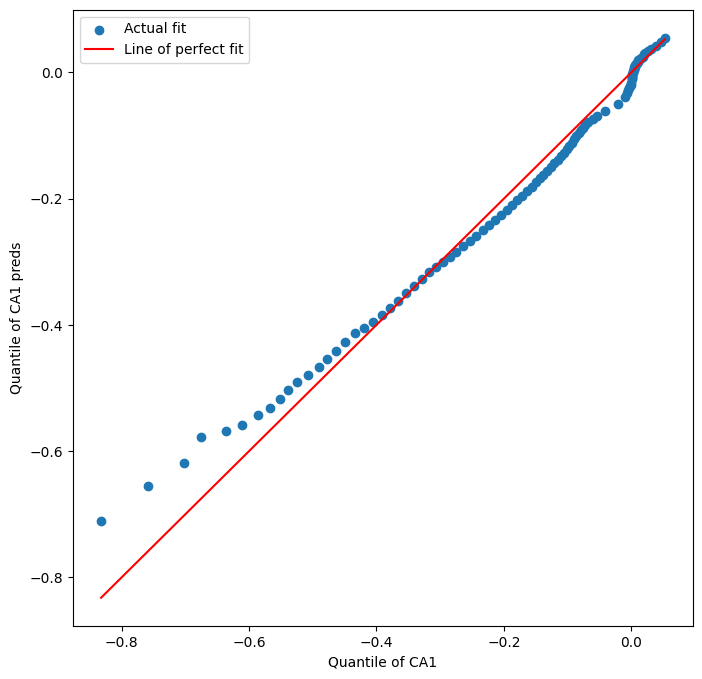

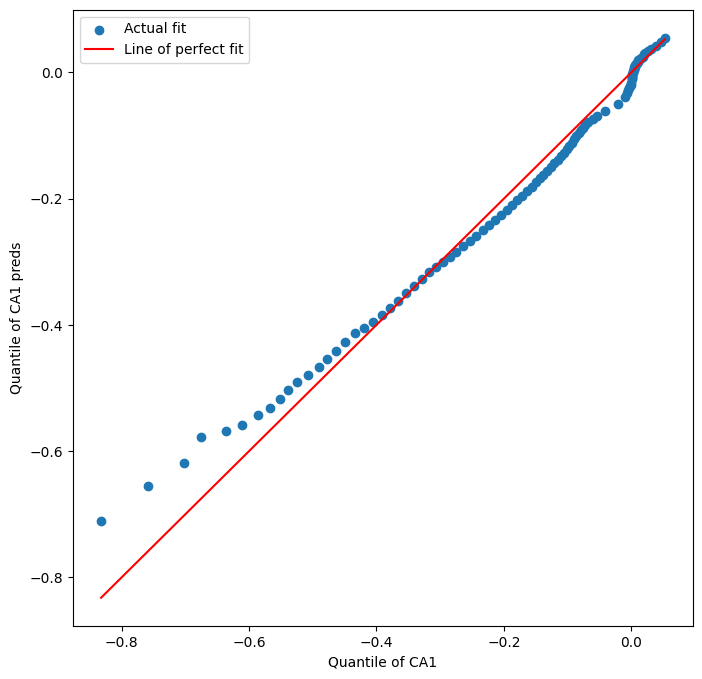

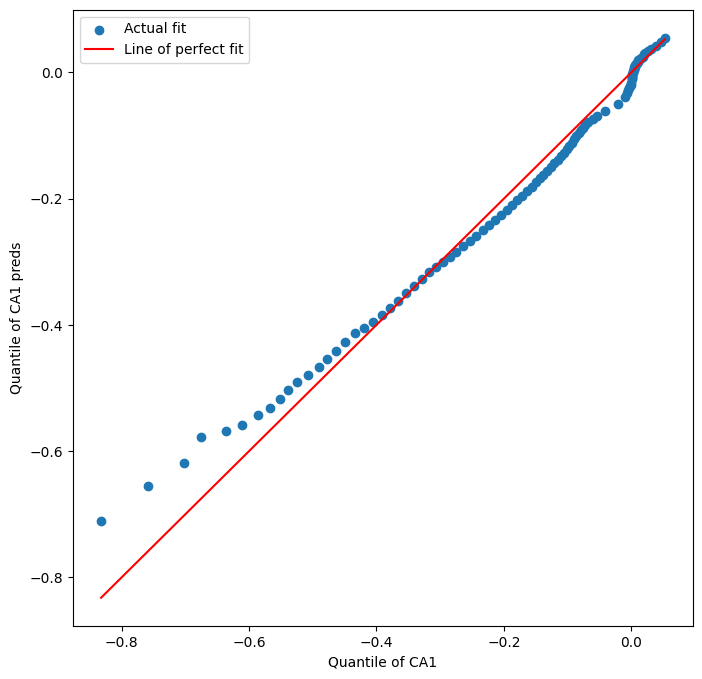

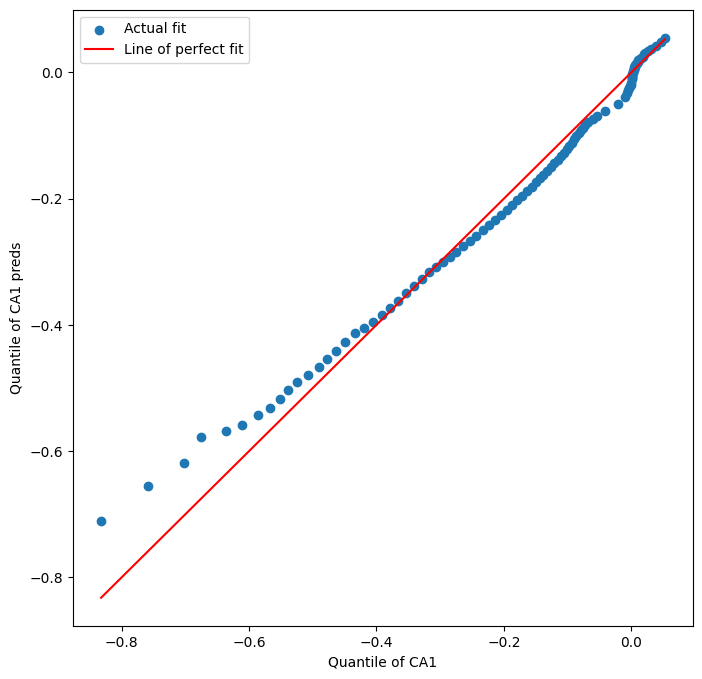

In [47]:
for i in range(10):
    plt.figure(figsize=(8, 8))
    plt.scatter(x=ca1_perc[i], y=ca1_preds_perc[i], label='Actual fit');
    plt.plot(ca1_perc[i], ca1_perc[i], color='r', label='Line of perfect fit');
    plt.xlabel('Quantile of CA1')
    plt.ylabel('Quantile of CA1 preds')
    plt.legend()
    plt.show()

### Тесты

In [18]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import ks_2samp

In [42]:
c = 0
for i in range(10):
    ks_statistic, p_value = ks_2samp(ca1[i][4500:5500], ca1_preds[i][4500:5500])
    
    print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
    	print(i, "Reject the null hypothesis. The two samples come from different distributions.")
    else:
        c += 1
        print(i, "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")

print("Количество, которое прошло тест:", c)

Kolmogorov–Smirnov Statistic: 0.223
P-value: 3.407327718086382e-22
0 Reject the null hypothesis. The two samples come from different distributions.
Kolmogorov–Smirnov Statistic: 0.347
P-value: 8.558957839743207e-54
1 Reject the null hypothesis. The two samples come from different distributions.
Kolmogorov–Smirnov Statistic: 0.168
P-value: 9.803857095159588e-13
2 Reject the null hypothesis. The two samples come from different distributions.
Kolmogorov–Smirnov Statistic: 0.239
P-value: 1.8396077338375514e-25
3 Reject the null hypothesis. The two samples come from different distributions.
Kolmogorov–Smirnov Statistic: 0.224
P-value: 2.162984997510718e-22
4 Reject the null hypothesis. The two samples come from different distributions.
Kolmogorov–Smirnov Statistic: 0.251
P-value: 4.564357804197157e-28
5 Reject the null hypothesis. The two samples come from different distributions.
Kolmogorov–Smirnov Statistic: 0.102
P-value: 5.984567716622354e-05
6 Reject the null hypothesis. The two sample

In [39]:
c = 0
for i in range(10):
    ks_statistic, p_value = ttest_ind(ca1[i][4500:5500], ca1_preds[i][4500:5500])
    
    print(f"Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")
    
    alpha = 0.01
    if p_value < alpha:
    	print(i, "Reject the null hypothesis. The two samples come from different distributions.")
    else:
        c += 1
        print(i, "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")
print("Количество, которое прошло тест:", c)

Statistic: -8.692370471053737
P-value: 7.257823834953276e-18
0 Reject the null hypothesis. The two samples come from different distributions.
Statistic: -2.1672701859784107
P-value: 0.03033204643418476
1 Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.
Statistic: -2.788068910795474
P-value: 0.005352533889070557
2 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 4.395516278576872
P-value: 1.1630734845703378e-05
3 Reject the null hypothesis. The two samples come from different distributions.
Statistic: -3.570817057526485
P-value: 0.0003642811693903545
4 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 2.029039059869321
P-value: 0.042586658979019046
5 Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.
Statistic: 3.995115127759661
P-value: 6.70064921551939e-05
6 Reject the null hypothesis. The two samples com

In [40]:
c = 0
for i in range(10):
    ks_statistic, p_value = mannwhitneyu(ca1[i][4500:5500], ca1_preds[i][4500:5500])
    
    print(f"Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")
    
    alpha = 0.01
    
    if p_value < alpha:
    	print(i, "Reject the null hypothesis. The two samples come from different distributions.")
    else:
        c += 1
        print(i, "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")
print("Количество, которое прошло тест:", c)

Statistic: 432080.0
P-value: 1.4428505506385335e-07
0 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 548013.0
P-value: 0.00020072455270335793
1 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 487639.0
P-value: 0.3384658413550681
2 Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.
Statistic: 580805.0
P-value: 3.9113379227315886e-10
3 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 451535.0
P-value: 0.00017465704773930656
4 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 475884.0
P-value: 0.061830153594234265
5 Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.
Statistic: 528777.0
P-value: 0.02584978527863288
6 Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.
Statistic: 4

In [41]:
c = 0
for i in range(10):
    ks_statistic, p_value = wilcoxon(ca1[i][4500:5500], ca1_preds[i][4500:5500])
    
    print(f"Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")
    
    alpha = 0.01
    
    if p_value < alpha:
    	print(i, "Reject the null hypothesis. The two samples come from different distributions.")
    else:
        c += 1
        print(i, "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")
print("Количество, которое прошло тест:", c)

Statistic: 68588.0
P-value: 5.470554517618209e-88
0 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 225756.0
P-value: 0.007336469359924239
1 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 178051.0
P-value: 2.7210110738610795e-15
2 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 94466.0
P-value: 3.3493584120044172e-65
3 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 82659.0
P-value: 3.6248570439829855e-75
4 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 154870.0
P-value: 1.6191201283770397e-25
5 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 60232.0
P-value: 4.3434781924437046e-96
6 Reject the null hypothesis. The two samples come from different distributions.
Statistic: 166840.0
P-value: 6.833479405763967e-20
7 Reject the null hypothe